# Propriétés des transformations de Fourier

In [8]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt

## Propriétés générales

Dans cette section, $x$ et $y$ représentent deux signaux temporels
dont les transformations de Fourier sont notées respectivement $X$ et $Y$.
Si le signal $x$ est périodique, sa période est notée $T$ (dans le cas discret) ou $N$ (dans le cas continu).
Par ailleurs, on dispose des constantes $a, b \in \mathbb{C}$, $\alpha,\, t_0,\, f_0 \in \mathbb{R}$ et $M\in \mathbb{N}$.
On note $\mathcal{F}$ l'une des quatre transformation de Fourier.
Les propriétés ci-dessous sont communes à toutes les transformations de Fourier, sauf mention contraire.


### Linéarité

Les transformations de Fourier sont linéaires :

$$
ax+by \quad\xrightarrow{\;\mathcal{F}\;}\quad aX+bY
$$


### Convolution
    
La convolution dans un domaine correspond à une multiplication dans l'autre domaine :

$$
x \cdot y \quad\xrightarrow{\;\mathcal{F}\;}\quad X*Y \\
x*y \quad\xrightarrow{\;\mathcal{F}\;}\quad X \cdot Y
$$


### Changement d'échelle

Pour la transformée de Fourier, la contraction dans un domaine correspond à une dilatation dans l'autre domaine
(en temporel, le signal est comprimé si $\alpha>1$ et dilaté si $0<\alpha<1$) :

$$
x(\alpha t) \quad\xrightarrow{\;\mathcal{F}\;}\quad \frac{1}{|\alpha|} X\left(\frac{f}{\alpha}\right)
$$

Pour la série de Fourier, la contraction ou la dilatation n'a aucun impact sur le résultat,
car la série de Fourier est indépendante de la valeur de la période du signal.

En temps discret, le principe de multiplication de la variable temporelle par une constante n'est pas possible.


### Translation

La translation dans un domaine correspond à une multiplication par une exponentielle complexe dans l'autre domaine :

* Translation en temporel :

$$
\text{SF :}\qquad  x(t-t_0) \quad&\xrightarrow{\;\mathcal{F}\;}\quad X[k] e^{-j2\pi k t_0 / T} \\
\text{TF :}\qquad  x(t-t_0) \quad&\xrightarrow{\;\mathcal{F}\;}\quad X(f) e^{-j2\pi f t_0} \\
\text{SFD :}\qquad x[n-n_0] \quad&\xrightarrow{\;\mathcal{F}\;}\quad X[k] e^{-j2\pi k n_0 / N}
$$


* Translation en fréquentiel :

$$
\text{SF :}\qquad  x(t) e^{+j2\pi k_0 t / T} \quad&\xrightarrow{\;\mathcal{F}\;}\quad X[k-k_0] \\
\text{TF :}\qquad  x(t) e^{+j2\pi f_0 / T} \quad&\xrightarrow{\;\mathcal{F}\;}\quad X(f-f_0) \\
\text{SFD :}\qquad x(t) e^{+j2\pi k_0 n / N} \quad&\xrightarrow{\;\mathcal{F}\;}\quad X[k-k_0]
$$

La multiplication par une exponentielle complexe correspond à une « modulation » en temporel
et à un « déphasage » en fréquentiel.
    
### Discrétisation et périodicité

À partir du tableau synthétisant les différentes transformées de Fourier (fait en exercice de TD),
on constate que la discrétisation de l'espace d'un domaine est équivalent à la périodicité du signal dans l'autre domaine.
Par conséquent, l'aspect continu de l'espace d'un domaine est équivalent à l'apériodicité du signal dans l'autre domaine.

Autrement dit :

$$
\text{signal à temps discret} \quad&\Leftrightarrow\quad \text{spectre périodique} \\
\text{signal à temps continu} \quad&\Leftrightarrow\quad \text{spectre apériodique} \\
\text{signal temporel périodique} \quad&\Leftrightarrow\quad \text{spectre discret en fréquence} \\
\text{signal temporel apériodique} \quad&\Leftrightarrow\quad \text{spectre continu en fréquence}
$$

## Théorème de Parseval–Plancherel

Le théorème de Parseval–Plancherel signifie qu'il y a conservation de l'énergie dans les deux domaines :
un signal temporel et sa transformation de Fourier ont la même énergie.

$$
\text{SF :}\qquad  \frac{1}{T} \int_T |x(t)|^2 dt &= \sum_{k=-\infty}^{+\infty} |X[k]|^2 \\
\text{TF :}\qquad  \int_{-\infty}^{+\infty} |x(t)|^2 dt &= \int_{\infty}^{+\infty} |X(f)|^2 df \\
\text{SFD :}\qquad \frac{1}{N} \sum_{n=0}^{N-1} |x[n]|^2 &= \sum_{k=0}^{N-1} |X[k]|^2
$$

## Condition de Dirichlet

Les conditions de Dirichlet assurent que la reconstruction d'un signal $x(t)$ à partir des coefficients de sa série de Fourier
est égale à $x(t)$, sauf aux points de discontinuité :

$$
x(t) = \mathcal{F}^{-1}\big[\mathcal{F}[x(t)]\big].
$$

Les conditions de Dirichlet sont au nombre de trois :

* $x(t)$ doit être absolument intégrable :

  $$
  \int_T [x(t)| dt < \infty,
  $$
  
* $x(t)$ a un nombre fini de minima et de maxima (dans un intervalle fini),

* $x(t)$ a un nombre fini de discontinuités (dans un intervalle fini), et ces discontinuités sont elles-mêmes finies.

## Phénomène de Gibbs

Le phénomène de Gibbs est l'apparition d'oscillations au abords des discontinuités d'un signal,
lorsque celui-ci est reconstruit à partir des coefficients de sa série de Fourier.
On comprend que si la reconstruction n'utilise qu'une partie des coefficients de la série de Fourier,
alors le signal reconstruit sera différent du signal original.
Lorsque le nombre de coefficients augmente, la reconstruction se rapproche du signal,
sauf au discontinuités où il se produit des oscillations qui ne peuvent s'atténuer.

```{glue:figure} G:props-fourier:gibbs
:name: "F:props-fourier:gibbs"

Reconstruction d'un créneau à partir de quelques coefficients de sa série de Fourier discrète.
```

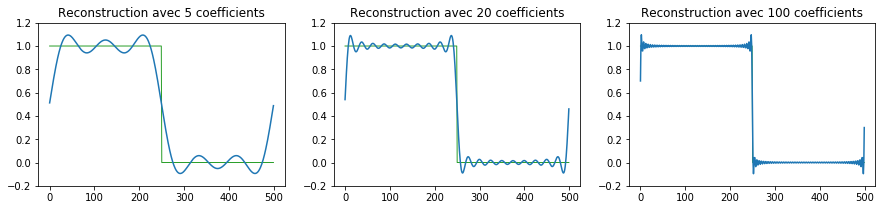

In [10]:
N = 500
n = np.arange(N)

# Signal de base
x = np.where(n<N/2, 1, 0)

# FFT
X = np.fft.fft(x)

# Nombre de coefficients de la FFT à conserver (de -K à K)
K = [5, 20, 100]

fig = plt.figure(figsize=(15,3))
for i, k in enumerate(K):
    
    # Annulation des coefficients de la FFT
    Y = X.copy()
    Y[k+1:N-k] = 0
    
    # Reconstruction
    y = np.fft.ifft(Y)
    y = np.real(y)
    
    # Affichage
    plt.subplot(1, len(K), i+1)
    plt.plot(n, x, "-", color="tab:green", linewidth=1)
    plt.plot(n, y)
    plt.ylim([-.2, 1.2])
    plt.title(f"Reconstruction avec {k} coefficients")

glue("G:props-fourier:gibbs", fig, display=False)